In [101]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Data Loading with Pandas for EDA

In [102]:
# Load the dataset
df = pd.read_csv('/kaggle/input/customer-purchase-dataset/customer_purchase_dataset (1).csv', parse_dates=['order_date'])
df.head()

,customer_id,order_date,total_amount,product_category,payment_type,delivery_location,days_since_last_purchase,repeat_purchase_next_30_days
0,58,2023-01-26,37206.75,Groceries,Credit Card,Lalitpur,26,0
1,217,2023-02-02,1974.96,Groceries,Credit Card,Biratnagar,154,0
2,288,2023-07-23,35942.97,Home Appliances,Digital Wallet,Lalitpur,114,1
3,4,2023-06-13,35057.90,Clothing,Bank Transfer,Lalitpur,55,1
4,53,2023-04-05,19306.40,Clothing,Bank Transfer,Biratnagar,67,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   1000 non-null   int64         
 1   order_date                    1000 non-null   datetime64[ns]
 2   total_amount                  1000 non-null   float64       
 3   product_category              1000 non-null   object        
 4   payment_type                  1000 non-null   object        
 5   delivery_location             1000 non-null   object        
 6   days_since_last_purchase      1000 non-null   int64         
 7   repeat_purchase_next_30_days  1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 62.6+ KB


In [104]:
df.describe()

,customer_id,order_date,total_amount,days_since_last_purchase,repeat_purchase_next_30_days
count,1000.000000,1000,1000.000000,1000.000000,1000.000000
mean,149.671000,2023-10-22 20:19:40.800000,25527.733050,89.439000,0.532000
min,1.000000,2023-01-01 00:00:00,508.400000,1.000000,0.000000
25%,68.000000,2023-06-06 00:00:00,13208.822500,43.000000,0.000000
50%,154.000000,2023-10-27 12:00:00,25864.365000,89.000000,1.000000
75%,229.250000,2024-03-17 06:00:00,37515.037500,132.000000,1.000000
max,300.000000,2024-08-03 00:00:00,49979.950000,180.000000,1.000000
std,88.307004,NaN,14172.471314,51.611239,0.499225


In [105]:
print("\nShape:", df.shape)


Shape: (1000, 8)


In [106]:
# Convert order_date to datetime objects
df['order_date'] = pd.to_datetime(df['order_date'])

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   1000 non-null   int64         
 1   order_date                    1000 non-null   datetime64[ns]
 2   total_amount                  1000 non-null   float64       
 3   product_category              1000 non-null   object        
 4   payment_type                  1000 non-null   object        
 5   delivery_location             1000 non-null   object        
 6   days_since_last_purchase      1000 non-null   int64         
 7   repeat_purchase_next_30_days  1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 62.6+ KB


In [108]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customer_id                     0
order_date                      0
total_amount                    0
product_category                0
payment_type                    0
delivery_location               0
days_since_last_purchase        0
repeat_purchase_next_30_days    0
dtype: int64


### Step 2: Exploratory Data Analysis (EDA)

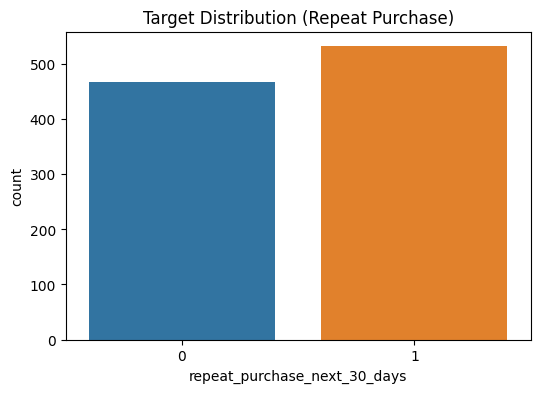

In [109]:
# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='repeat_purchase_next_30_days', data=df)
plt.title('Target Distribution (Repeat Purchase)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


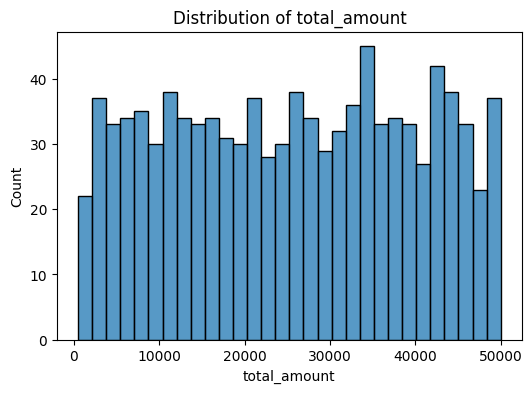

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


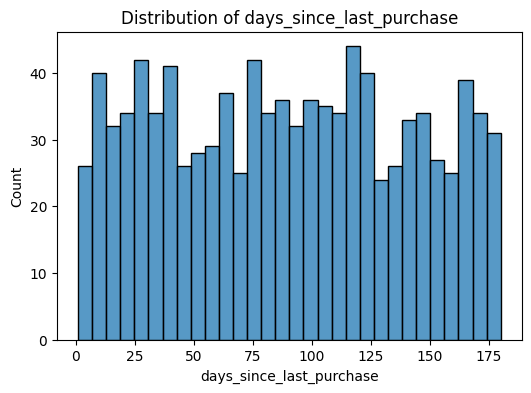

In [110]:
# Numerical features distribution
numerical_features = ['total_amount', 'days_since_last_purchase']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], bins=30)
    plt.title(f'Distribution of {feature}')
    plt.savefig(f'{feature}_distribution.png')
    plt.show()

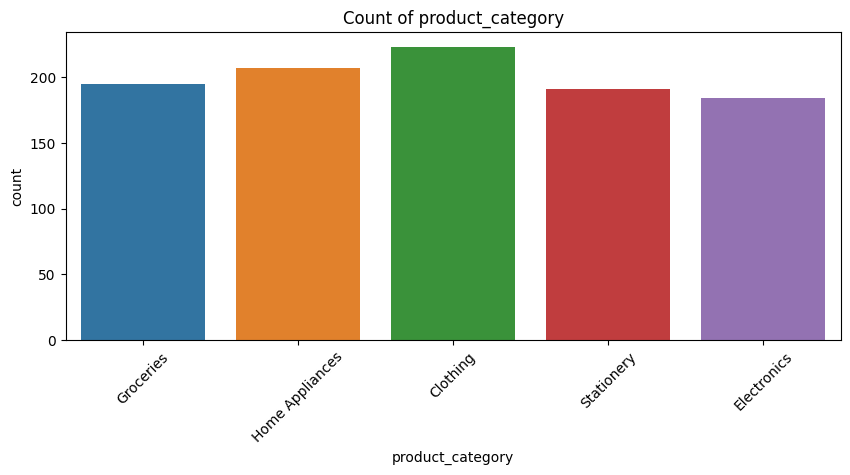

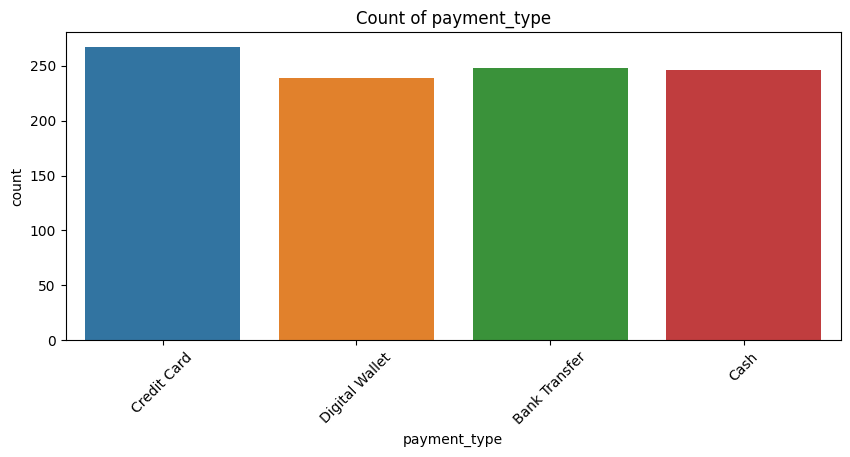

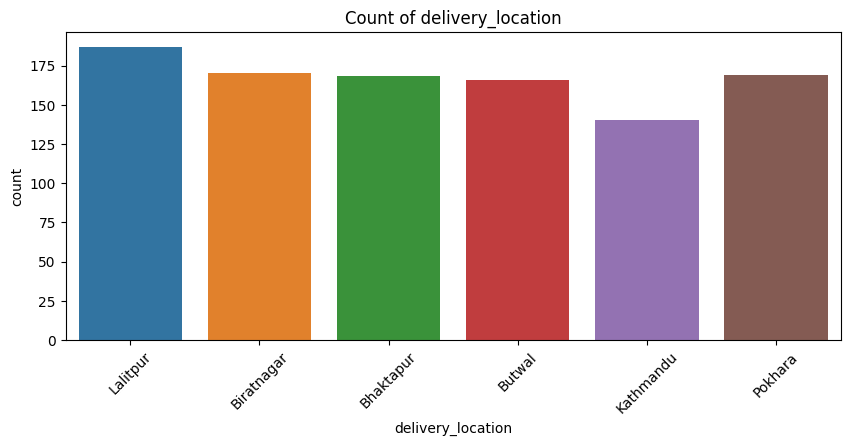

In [111]:
# Categorical features
categorical_features= ['product_category', 'payment_type', 'delivery_location']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
    plt.show()

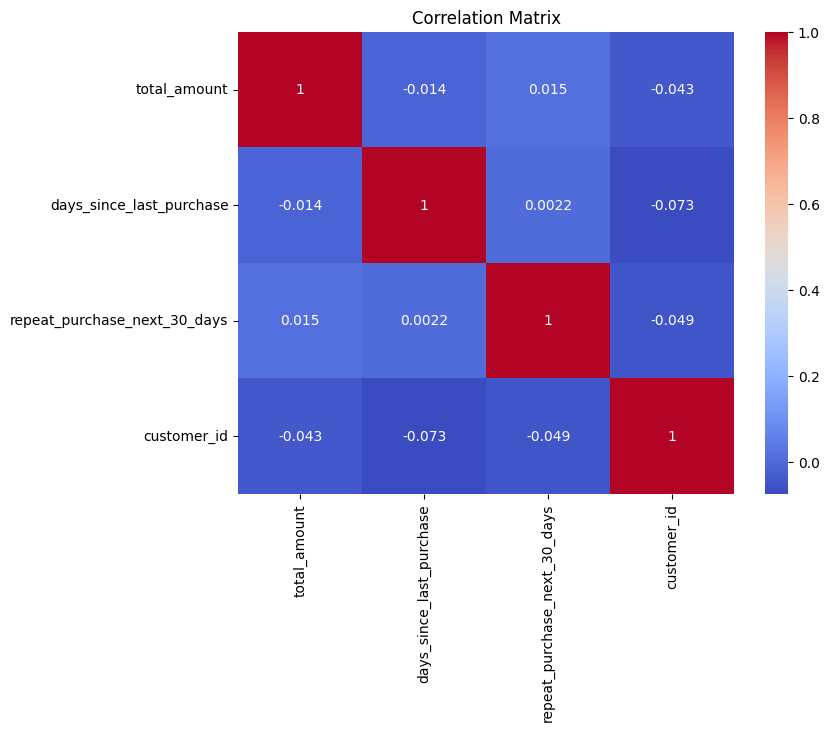

In [112]:
# Correlation matrix
corr = df[num_cols + ['repeat_purchase_next_30_days', 'customer_id']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

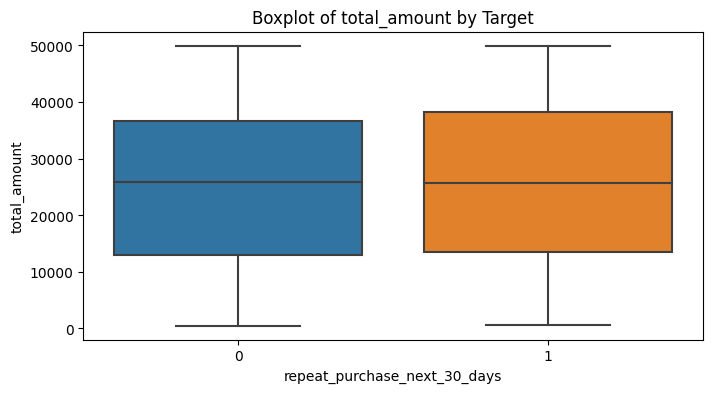

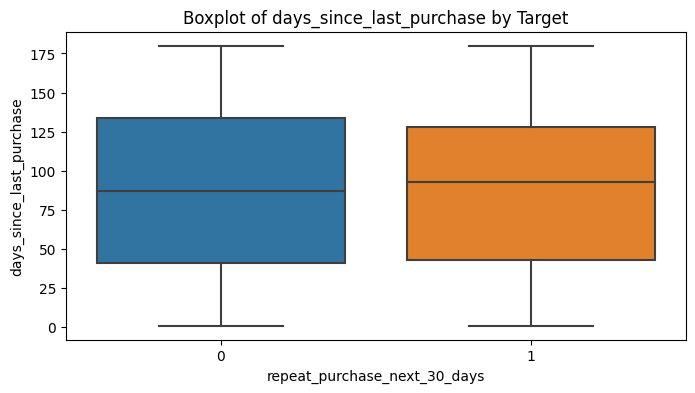

In [113]:
# Boxplots for outliers
for col_name in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='repeat_purchase_next_30_days', y=col_name, data=df)
    plt.title(f'Boxplot of {col_name} by Target')
    plt.show()

In [114]:
df.head()

,customer_id,order_date,total_amount,product_category,payment_type,delivery_location,days_since_last_purchase,repeat_purchase_next_30_days
0,58,2023-01-26,37206.75,Groceries,Credit Card,Lalitpur,26,0
1,217,2023-02-02,1974.96,Groceries,Credit Card,Biratnagar,154,0
2,288,2023-07-23,35942.97,Home Appliances,Digital Wallet,Lalitpur,114,1
3,4,2023-06-13,35057.90,Clothing,Bank Transfer,Lalitpur,55,1
4,53,2023-04-05,19306.40,Clothing,Bank Transfer,Biratnagar,67,0
